 # Name : - VISHAL KUMAR YADAV

Task4 : - Exploratory Data Analysis - Terrorism

DATA SET: https://bit.ly/2TK5Xn5

Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’ & To find out: -

- The hot zone of terrorism.
- What all security issues and insights you can derive by EDA?


In [49]:
#Importing libraries
import math
import warnings
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings('ignore')

In [50]:
#Load DATA
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin-1')

#Understanding the Data
#Geography: Worldwide
#Time period: 1970-2017, except 1993
#Unit of analysis: Hot Zone
#Variables: >100 variables on location, tactics, perpetrators, targets, and outcomes

In [51]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Checking the data

In [52]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [54]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [55]:
#Rename of columns
df.rename(columns={'eventid':'Event','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                   'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'}
          ,inplace=True)

In [56]:
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed',
       'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [57]:
df['Casualities']=df['Killed']+df['Wounded']

In [58]:
df1=df.copy()

In [59]:
df1.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [60]:
df1.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities     16874
dtype: int64

In [61]:
df1.Group.value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Territorial Anti-Fascist Patrols                        1
Jai Shri Ram Hindu Bhai Group                           1
Revolted Persons of the Polytech School                 1
Abu Abbas Brigade                                       1
Comando Vermelho (Red Command)                          1
Name: Group, Length: 3537, dtype: int64

In [62]:
df1["Killed"].value_counts()

0.0      88149
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
184.0        1
163.0        1
135.0        1
128.0        1
280.0        1
Name: Killed, Length: 205, dtype: int64

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181257 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Target       181055 non-null  object 
 12  Summary      115562 non-null  object 
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  Casualities  164817 non-null  float64
dtypes: float64(5), int64(3),

DATA VISUALIZATION

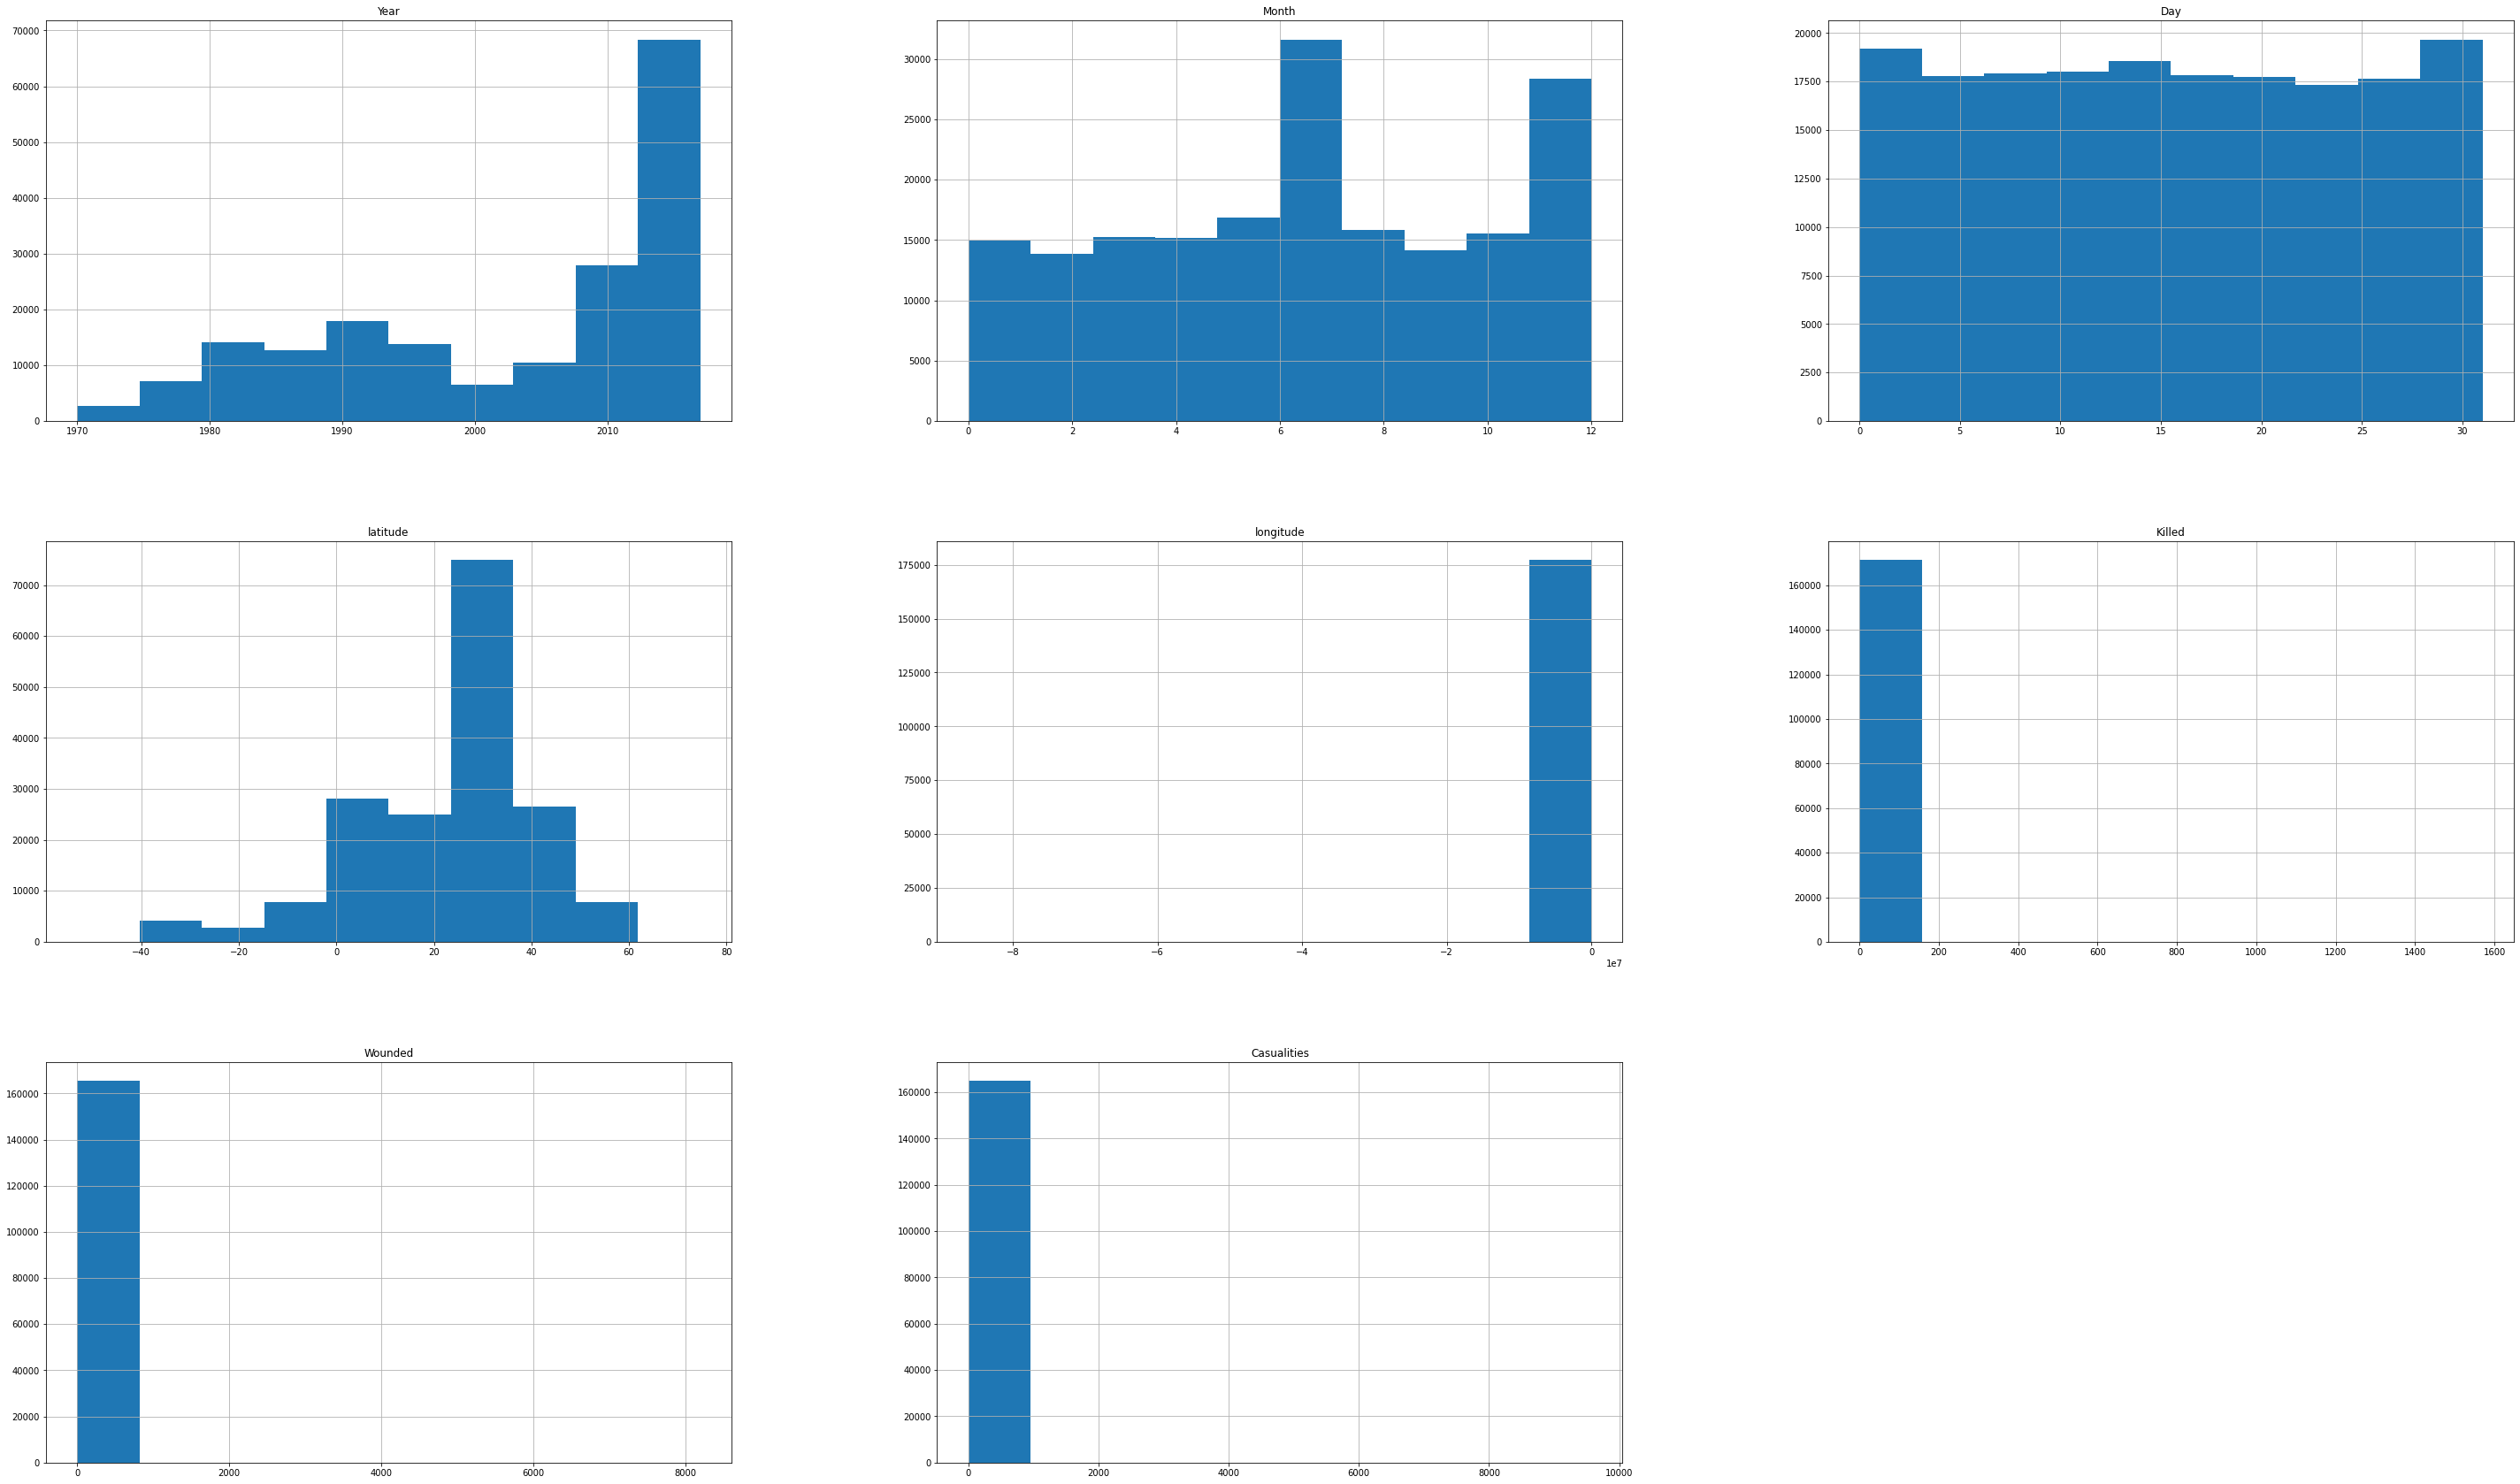

In [64]:
#Histogram

df1.hist(figsize=(50,30))
plt.show()

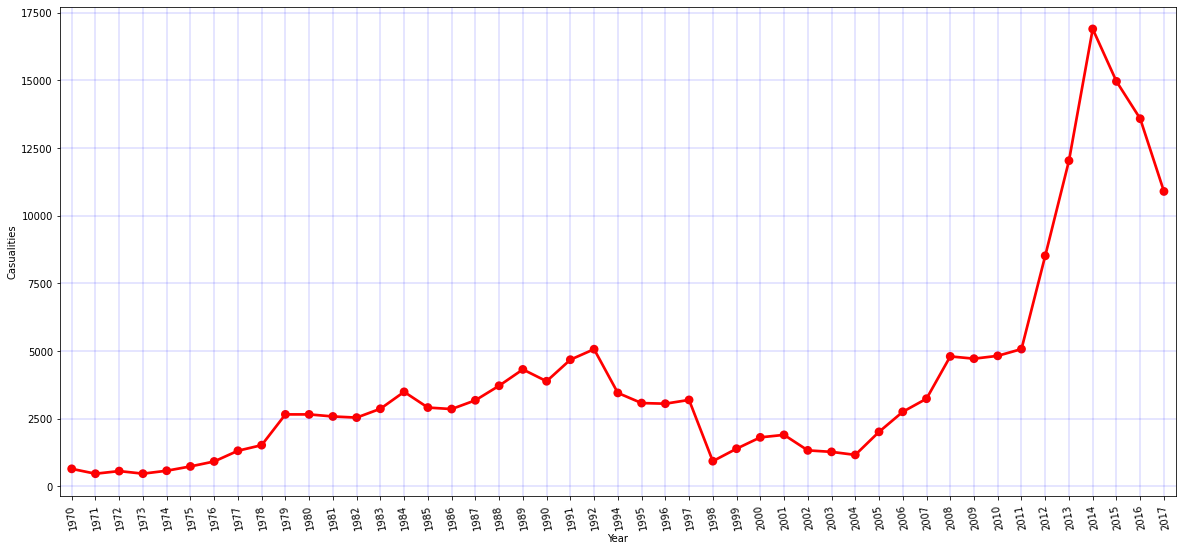

In [65]:

#Casualities

year = df1["Year"].value_counts()
Year_List = sorted(list(zip(year.index,year.values)))
Year_Attack, Counts_attack = zip(*Year_List)
Year_Attack, Counts_attack = list(Year_Attack), list(Counts_attack)

f,ax = plt.subplots(figsize=(20,9))
sns.pointplot(x=Year_Attack,y=Counts_attack,color="Red")
plt.xlabel("Year")
plt.xticks(rotation=100)
plt.ylabel("Casualities")
plt.grid(color='b', linestyle='-', linewidth=0.2)

<AxesSubplot:xlabel='AttackType'>

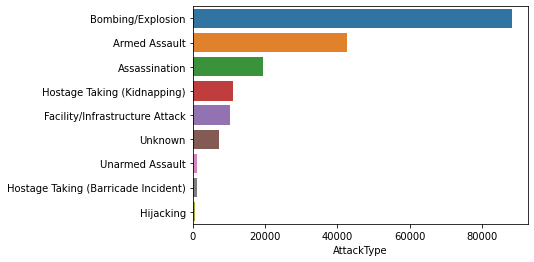

In [66]:
#Attack type

sns.barplot(x=df1.AttackType.value_counts(), y=df1.AttackType.value_counts().index,
            order = df1.AttackType.value_counts().iloc[:25].index, orient="h")

In [67]:
weapon_type= df1['Weapon_type'].value_counts().reset_index().rename(columns={'index': 'Weapon Types'})
weapon_type.columns.values[1] = 'Count'


fig = px.pie(weapon_type, values='Count', names='Weapon Types',
             title='Weapon Types Attack',
             hover_data=['Count'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<AxesSubplot:xlabel='Target_type'>

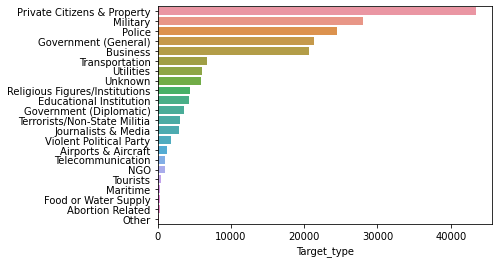

In [68]:
# Target Type

sns.barplot(x=df1.Target_type.value_counts(), y=df1.Target_type.value_counts().index,
            order = df1.Target_type.value_counts().iloc[:25].index)

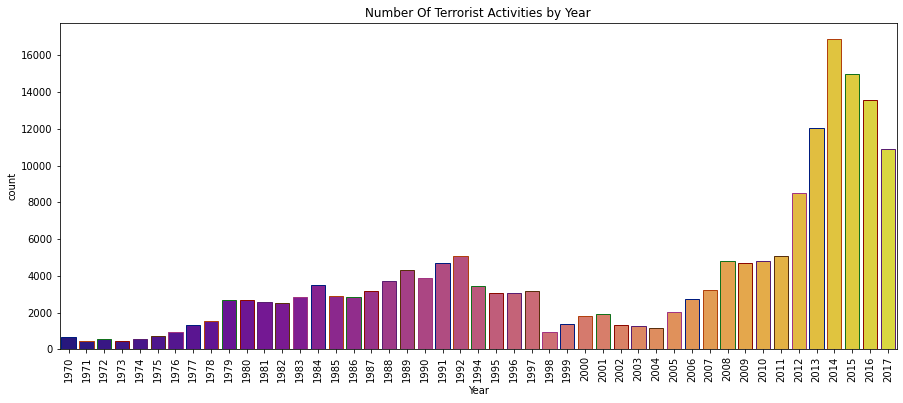

In [69]:
#Year by Year Activities

plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df1,palette='plasma',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by Year')
plt.show()

<AxesSubplot:>

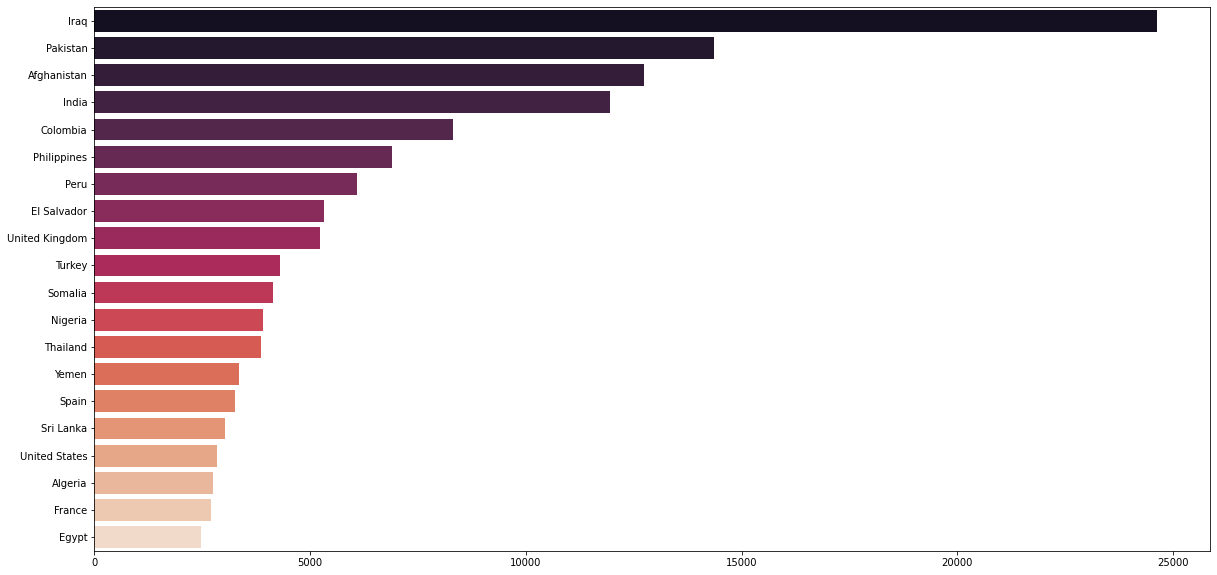

In [70]:
#Top Country
fig,axes=plt.subplots(figsize=(20,10),nrows=1,ncols=1)
sns.barplot(x=df['Country'].value_counts()[:20].values,y=df['Country'].value_counts()[:20].index,palette='rocket')

<AxesSubplot:xlabel='city'>

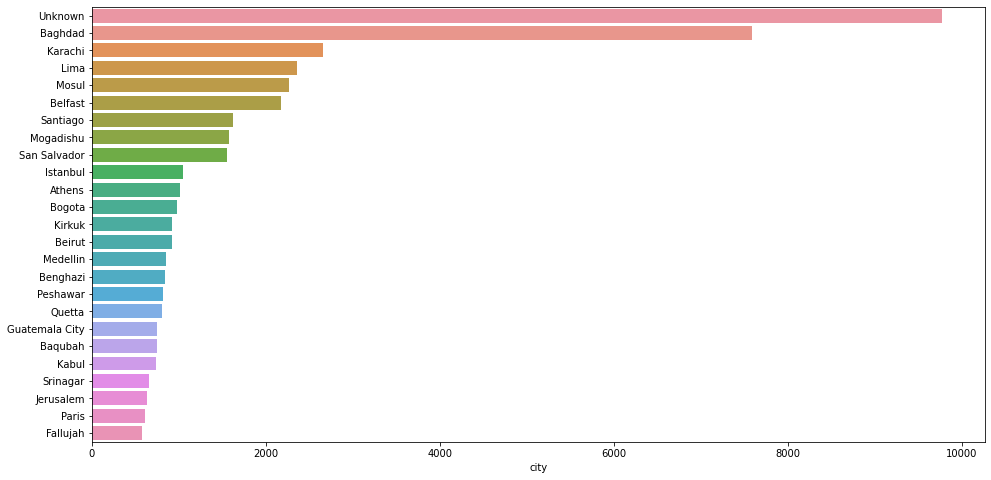

In [71]:
#The most attacted Provinces

plt.subplots(figsize=(16,8))
sns.barplot(x=df1.city.value_counts(), y=df1.city.value_counts().index,
            order = df1.city.value_counts().iloc[:25].index, orient="h")

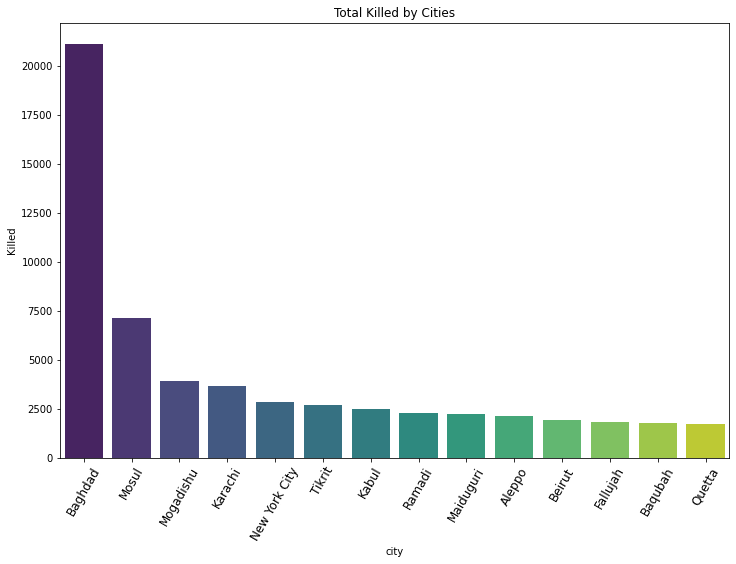

In [72]:
#Total Terrorist Activity cities wise

most_citites=df1.groupby("city")["Killed"].sum().to_frame()
most_citites=most_citites.sort_values("Killed",ascending=False)[1:15]
plt.subplots(figsize=(12,8))
sns.barplot(most_citites.index,most_citites.Killed,palette="viridis")
plt.title("Total Killed by Cities")
plt.xticks(rotation=60)
plt.xticks(fontsize=12)
plt.show()

Text(0.5, 1.0, 'Number of Terrorist Activities Each Year in Baghdad')

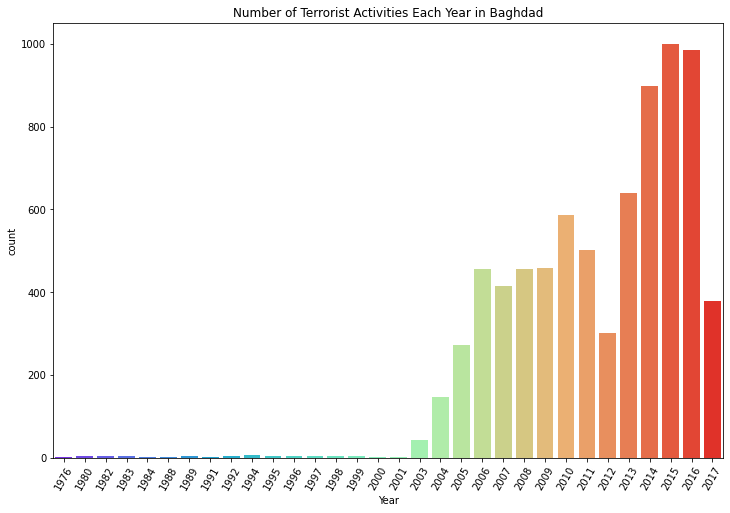

In [73]:
#Most effective City

Baghdad_data = df1[df1["city"]=="Baghdad"]

plt.subplots(figsize=(12,8))
sns.countplot("Year",data=Baghdad_data,palette="rainbow")
plt.xticks(rotation=60)
plt.title("Number of Terrorist Activities Each Year in Baghdad")

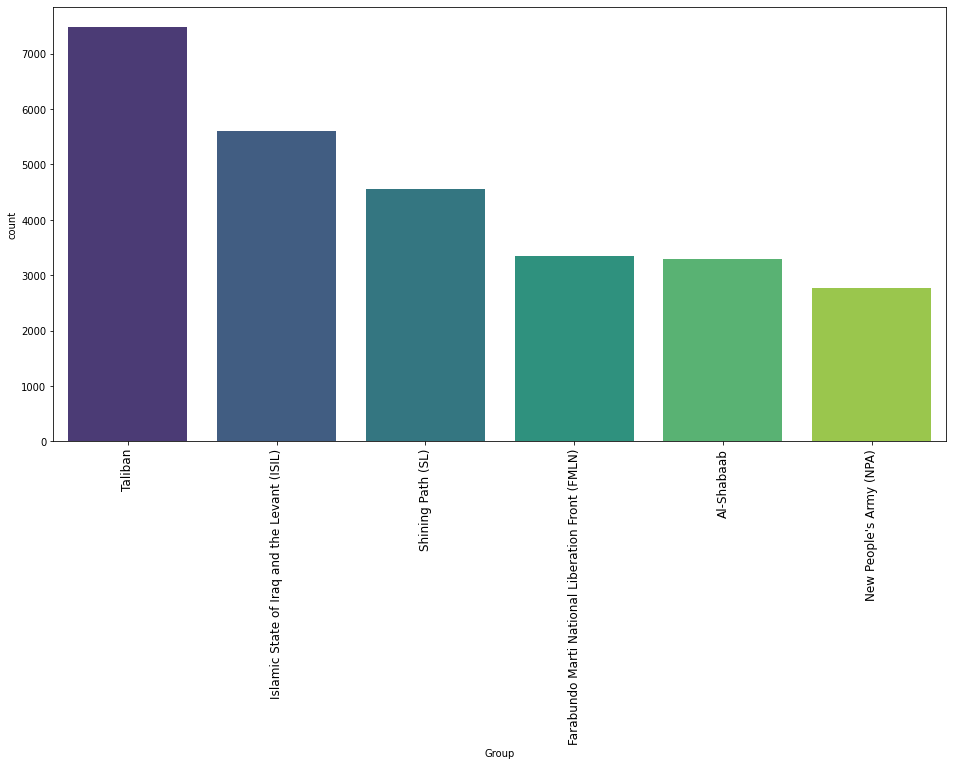

In [74]:
#Group wise attack 

groups = df1["Group"].value_counts().drop("Unknown").index[:6]
groups = df1[df1["Group"].isin(groups)]
plt.subplots(figsize=(16,8))
sns.countplot("Group",data=groups,order=groups.Group.value_counts().index,palette="viridis")
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.show()

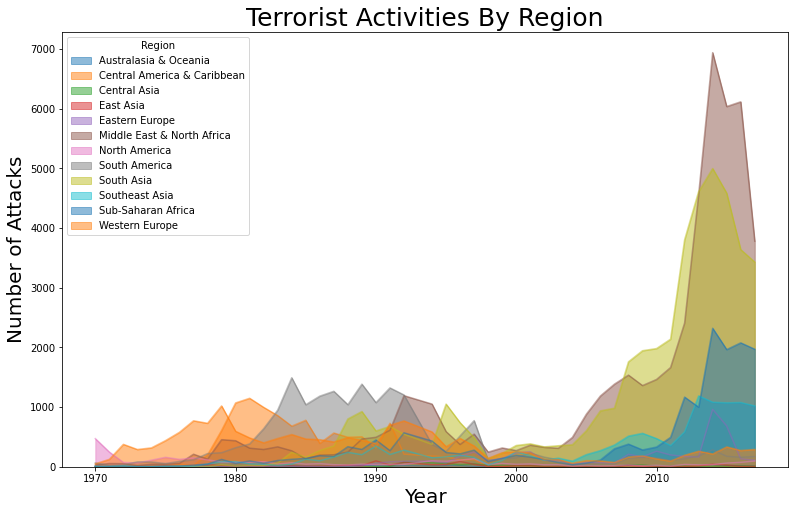

In [82]:
#Region wise activites

terror_region=pd.crosstab(df1.Year,df1.Region).plot(kind='area',stacked=False,figsize=(13,8))
terror_region.plot(color=sns.color_palette('brg',20))
plt.title('Terrorist Activities By Region',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

Q1. As a security/defense analyst, try to find out the hot zone of terrorism?

- Hot zone of global terrorism is found at " Iraq ".
- Baghdad is the most attack city and also top in the Casualities

Q2. What all security issues and insights you can derive by EDA?¶

- Security Issues

Inter country travelling without proper checking of documents.

Illegal and illogical selling of firearms and explosives.

Lack of police protection and patroling at residential areas.

Lack of good child security forces.

Political turmoil at certain major countries.

- Insights

Middle East, North America & South Asia are most of attack Region 

Highest number of terrorism cases were recorded after 2010.

Iraq has the highest number of terrorism cases.

Attack types are bombing explosion , armed assault , facililty/infrastructure attack

Most common target subsets are - private properties , citizens

The most common weapon types are - explosives then firearms Their subtypes being unknown

